# Capstone III

# **Background**

Autism spectrum disorder (ASD) is, as defined by the National Institute of Mental Health, a neurological and developmental disorder that affects how people interact with others, communicate, learn, and behave. There are a wide range of conditions that a person with ASD could possibly have, and knowing the signs from an early age can be beneficial for those who have the disorder. While acknowledging the factors can help, not many people outside of ASD specialists and activists know what signs to look for. But having information available that asks those factors out to the wider public can help with early diagnosis and help those who have the disorder find resources to help. 

The datasets are provided by Dr. Fadi Fayez Thabtah, a lecturer from the Manukau Institute of Technology in Auckland, New Zealand. He helped create an app that asked specific questions to quantify if the person who is taking the test could have ASD. Using the data he provided from the app through the UC Irvine Machine Learning Repository, we can use the results to determine if the test taker, or the person who is having the test conducted on them, has ASD. 

The datasets contain 1100 test takers, split into three age group. Each dataset is split between the two sections: the questions asked, with 1 corresponding to a ‘yes’ and 0 corresponding to a ‘no’, and demographics from the test taker, such as age, gender, country of origin, ethnicity, and whether the test taker is the one asking for a self diagnosis or if it is for another person. 

From this dataset, we will confirm if the tests are able to determine if a person has ASD based on their score. From that score, we will also look at whether two factors, infant jaundice and gender, are also factors in determining ASD.

**Links for the datasets:**

[Autistic Spectrum Disorder Screening Data for Children Data Set](https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++) [[CSV file](https://drive.google.com/file/d/1vuIdfuL6lB1cG77aKMhG40TpL5wkmDOE/view?usp=share_link)]

[Autistic Spectrum Disorder Screening Data for Adolescent Data Set](https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++) [[CSV file](https://drive.google.com/file/d/1umxd66yNr33t_qjS0ErLmS2g1c3L_kmq/view?usp=share_link)]

[Autism Screening Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult) [[CVS file](https://drive.google.com/file/d/1FWttCOP_cpG9OxlPsRfgCSBIKanqS5eO/view?usp=share_link)]





# **Part I - Importing Data**

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from scipy import stats
import math
import seaborn as sns

In [ ]:
## Import the converted csv files from Google Drive

child_df = pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/Autism-Child-Data.csv')
teen_df = pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/Autism-Adolescent-Data.csv')
adult_df = pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/Autism-Adult-Data.csv')

# **Part II - Cleaning and Combining the Data**

In [ ]:
## Collate the datasets into one table and confirm that all rows are included

new_df = pd.concat([child_df, teen_df, adult_df])
new_df.shape

(1100, 23)

In [ ]:
## Check to see if there are any nulls in the dataset

new_df.isnull()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jaundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,contry_of_res
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
701,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
## Remove all nulls and confirm

filtered_df = new_df.fillna('Unknown')
all_df = filtered_df.drop(['contry_of_res'], axis=1)
all_df.info()
print(all_df.size)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1100 non-null   int64 
 1   A1_Score         1100 non-null   int64 
 2   A2_Score         1100 non-null   int64 
 3   A3_Score         1100 non-null   int64 
 4   A4_Score         1100 non-null   int64 
 5   A5_Score         1100 non-null   int64 
 6   A6_Score         1100 non-null   int64 
 7   A7_Score         1100 non-null   int64 
 8   A8_Score         1100 non-null   int64 
 9   A9_Score         1100 non-null   int64 
 10  A10_Score        1100 non-null   int64 
 11  age              1100 non-null   object
 12  gender           1100 non-null   object
 13  ethnicity        1100 non-null   object
 14  jaundice         1100 non-null   object
 15  austim           1100 non-null   object
 16  country_of_res   1100 non-null   object
 17  used_app_before  1100 non-null   o

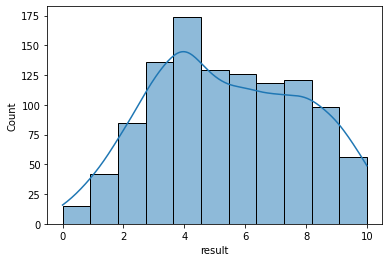

In [ ]:
## Run histogram to look at skew and kurtosis

ax = sns.histplot(all_df['result'], bins=11, kde=True)

# **Hypothesis 1:**


*   **Null Hypothesis:** Quiz score result does not indicate autism
*   **Alternate Hypothesis:** Quiz score result indicate autism



In [ ]:
## Pull all information from table and pull out all "YES" from Class/ASD column

autism_y = all_df['Class/ASD'] == 'YES'
asd_y = all_df.iloc[autism_y.values]
asd_y

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
6,7,1,0,1,1,1,1,0,1,0,...,m,White-European,no,no,United Kingdom,no,7,4-11 years,Parent,YES
7,8,1,1,1,1,1,1,1,1,0,...,f,Middle Eastern,no,no,Bahrain,no,8,4-11 years,Parent,YES
8,9,1,1,1,1,1,1,1,0,0,...,f,Middle Eastern,no,no,Bahrain,no,7,4-11 years,Parent,YES
10,11,1,0,0,0,1,1,1,1,1,...,m,White-European,yes,no,United Kingdom,no,7,4-11 years,Self,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,697,1,1,1,1,1,1,0,1,1,...,m,Turkish,no,yes,Australia,no,9,18 and more,Self,YES
698,699,1,1,1,1,1,1,1,1,1,...,f,Pasifika,no,no,Australia,no,10,18 and more,Self,YES
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
701,702,1,0,1,1,1,0,1,1,0,...,f,Unknown,no,no,Russia,no,7,18 and more,Unknown,YES


In [ ]:
## Pull all "NO" from Class/ASD column

autism_n = all_df['Class/ASD'] == 'NO'
asd_n = all_df.iloc[autism_n.values]
asd_n

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,Unknown,no,no,Jordan,yes,5,4-11 years,Unknown,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,Unknown,yes,no,Jordan,no,4,4-11 years,Unknown,NO
5,6,0,0,1,0,1,1,0,1,0,...,m,Unknown,no,yes,Egypt,no,5,4-11 years,Unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,694,1,0,0,1,0,0,0,1,0,...,f,White-European,no,no,United Kingdom,no,4,18 and more,Self,NO
695,696,1,0,1,1,0,0,1,1,0,...,m,Latino,no,no,Brazil,yes,5,18 and more,Parent,NO
697,698,1,1,1,1,1,0,0,0,0,...,f,Asian,no,no,Philippines,no,6,18 and more,Self,NO
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO


In [ ]:
## Obtain the range and mean of the "YES" score
 
asd_y['result'].describe()

count    393.000000
mean       8.234097
std        1.033203
min        7.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: result, dtype: float64

In [ ]:
## Obtain the range and mean of the "NO" score

asd_n['result'].describe()

count    707.000000
mean       3.842999
std        1.556114
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: result, dtype: float64

In [ ]:
## Conducting t-test to gain the p-value

stats.ttest_ind(asd_y['result'], asd_n['result'])

Ttest_indResult(statistic=50.129626622690004, pvalue=4.1175147027791398e-286)

Reject the null hypothesis, as the p value is significant at p < 0.05



In [ ]:
## Run confidence interval function for the "YES" and "NO" responses

def get_95_ci(array_1, array_2):    
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(asd_n['result'], asd_y['result'])

'The difference in means at the 95% confidence interval (two-tail) is between 4.237499518418698 and 4.544696694659535.'

The difference in mean at the 95% confidence interval is between 4.238 and 4.545.

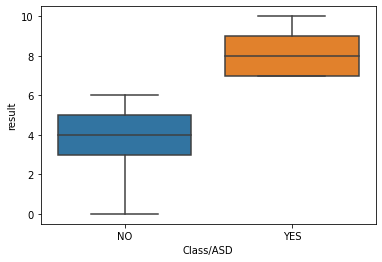

In [ ]:
## Run boxplots of the 'Class/ASD' scores

sns.boxplot(y='result', x='Class/ASD', data=all_df)

The critical value is small, at p < 0.05. The "YES" score is between 7-10 with a mean of 8.234, while the "NO" has a score between 0-6 with a mean of 3.843. There is a 95% confidence interval between 4.238 and 4.545. **Based on this result, we reject the null hypothesis**. 

---

# **Hypothesis 2:** 


*   **Null hypothesis:** Infant jaundice does not indicate autism
*   **Alternate hypothesis:** Infant jaundice indicates autism




In [ ]:
## Pull all "yes" responses from the 'jaundice' column and get the range and mean from the 'result' column

j_y = all_df['jaundice'] == 'yes'
jaun_y = all_df.iloc[j_y.values]
jaun_y['result'].describe()

count    165.000000
mean       6.121212
std        2.451450
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: result, dtype: float64

In [ ]:
## Pull all "no" responses from the 'jaundice' column and get the range and mean from the 'result' column

j_n = all_df['jaundice'] == 'no'
jaun_n = all_df.iloc[j_n.values]
jaun_n['result'].describe()

count    935.000000
mean       5.286631
std        2.516579
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: result, dtype: float64

In [ ]:
## Run t-test to find p-value

stats.ttest_ind(jaun_y['result'], jaun_n['result'])

Ttest_indResult(statistic=3.9425093687674218, pvalue=8.573736884960422e-05)

Reject the null hypothesis, as the p value is significant at p < 0.05

In [ ]:
## Run confidence interval function of the 'jaundice' results

get_95_ci(jaun_n['result'], jaun_y['result'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.4272248475473046 and 1.2419373627913752.'

The difference in means at the 95% confidence interval is betwen 0.427 and 1.242.

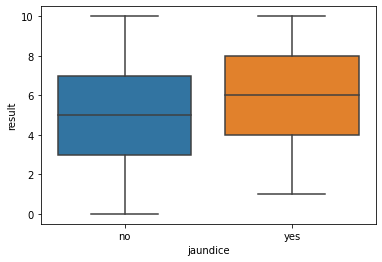

In [ ]:
## Run boxplot of the 'jaundice' score

sns.boxplot(y='result', x='jaundice', data=all_df)

The critical value is small, at p < 0.05. The "yes" score ranges from 1 to 10 while the "no" run from 0 to 10. The mean for "yes" is 6.121 while the "no" is 5.287. There is a 95% confidence interval between 0.427 and 1.242. While the ranges are fairly similar, the p-value does have a critical value that rejects the null. **Based on this result, we reject the null hypothesis**. 

---

# **Hypothesis 3:** 


*   **Null hypothesis:** Gender does not affect autism diagnosis
*   **Alternate hypothesis:** Males are more likely to be diagnosed with autism

In [ ]:
## Pull all "m" responses from the 'gender' column and get the range and mean of the 'result' column

g_m = all_df['gender'] == 'm'
gender_m = all_df.iloc[g_m.values]
gender_m['result'].describe()

count    625.000000
mean       5.425600
std        2.502175
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: result, dtype: float64

In [ ]:
## Pull all "f" responses from the 'gender' column and get the range and mean of the 'result' column

g_f = all_df['gender'] == 'f'
gender_f = all_df.iloc[g_f.values]
gender_f['result'].describe()

count    475.000000
mean       5.393684
std        2.553801
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: result, dtype: float64

In [ ]:
## Run a t-test to find the p-value

stats.ttest_ind(gender_m['result'], gender_f['result'])

Ttest_indResult(statistic=0.2076849103905338, pvalue=0.83551351334964)

Fail to reject the null hypothesis, as p = 0.836


In [ ]:
## Run confidence interval function of the 'gender' results

get_95_ci(gender_m['result'], gender_f['result'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.33395763432461334 and 0.27012605537724466.'

The difference in means at the 95% confidence interval is betwen -0.334 and 0.270.

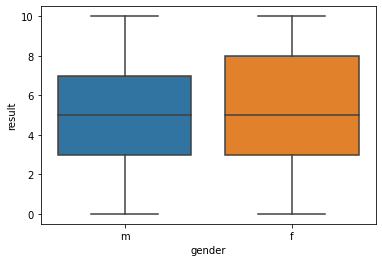

In [ ]:
## Run boxplot of the 'gender' scores

sns.boxplot(y='result', x='gender', data=all_df)

The p-value is large, at p = 0.836. Both the male and female ranges are between 0-10. The means are similar, with males having a mean of 5.427 and females having a mean of 5.394. There is a 95% confidence interval between -0.334 and 0.270. **With the p value not falling into the critical value, we fail to reject the null hypothesis**.

---

# **Conclusions and Recommendations**

The dataset was able to show that the app is able to determine if a test taker has ASD. It was also able to determine that having infant jaundice can be a factor in diagnosing ASD, while gender would not be a factor. 

From these test, we can determine that the app can be useful in spreading awareness and showing signs of ASD to the wider public. This can help people determine if people they know (usually family members) should look for treatment. Primary care physicians can also use the app to determine if patients of theirs have symptoms and whether they should recommend specialists tho them. The app developer can also use this information to input information that leads test takers to specialists or sites to help them seek treatment as well.